In [2]:
import zipfile
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
# Descomprimir el archivo ZIP
zip_path = r'C:\Users\Owner\OneDrive\Escritorio\aprendizaje automatico\frutas-360.zip'
extract_path = r'C:\Users\Owner\OneDrive\Escritorio\aprendizaje automatico\frutas_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Descompresión completada.")

Descompresión completada.


In [5]:
# Rutas de las imágenes de entrenamiento y prueba
train_dir = os.path.join(extract_path, 'frutas-360', 'Training')
test_dir = os.path.join(extract_path, 'frutas-360', 'Test')

In [6]:
# Configuración de parámetros
target_size = (100, 100)  # Tamaño de la imagen
batch_size = 32  # Tamaño del lote


In [7]:
# Preparar el generador de datos con un aumento de datos moderado
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalización
    rotation_range=20,  # Aumento de rotación
    width_shift_range=0.1,  # Desplazamiento horizontal
    height_shift_range=0.1,  # Desplazamiento vertical
    zoom_range=0.1,  # Zoom
    horizontal_flip=True,  # Volteo horizontal
    validation_split=0.2  # Validación en el 20% de los datos
)

In [8]:
# Generador para entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    class_mode='categorical',
    batch_size=batch_size,
    subset='training',
    seed=42
)

Found 8698 images belonging to 24 classes.


In [9]:
# Generador para validación
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    class_mode='categorical',
    batch_size=batch_size,
    subset='validation',
    seed=42
)

Found 2166 images belonging to 24 classes.


In [10]:
# Crear modelo CNN simple para clasificación de imágenes
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.2),  # Reducir sobreajuste

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.2),  # Reducir sobreajuste

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.3),  # Reducir sobreajuste

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Reducir sobreajuste
    Dense(train_generator.num_classes, activation='softmax')
])


c:\Users\Owner\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compilación del modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
# Usar EarlyStopping para evitar sobreajuste
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [13]:
# Entrenamiento del modelo
history = model.fit(
    train_generator,
    epochs=10,  # Pocas épocas por ahora, puede que se necesiten más
    validation_data=validation_generator,
    callbacks=[early_stop]
)

Epoch 1/10


c:\Users\Owner\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


272/272 ━━━━━━━━━━━━━━━━━━━━ 166s 591ms/step - accuracy: 0.4438 - loss: 1.7593 - val_accuracy: 0.9695 - val_loss: 0.0980
Epoch 2/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 91s 332ms/step - accuracy: 0.9519 - loss: 0.1359 - val_accuracy: 0.9774 - val_loss: 0.0646
Epoch 3/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 98s 354ms/step - accuracy: 0.9725 - loss: 0.0820 - val_accuracy: 0.9797 - val_loss: 0.0612
Epoch 4/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 104s 376ms/step - accuracy: 0.9716 - loss: 0.0911 - val_accuracy: 0.9949 - val_loss: 0.0213
Epoch 5/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 100s 363ms/step - accuracy: 0.9840 - loss: 0.0493 - val_accuracy: 0.9838 - val_loss: 0.0548
Epoch 6/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 92s 334ms/step - accuracy: 0.9726 - loss: 0.0766 - val_accuracy: 0.9995 - val_loss: 0.0060
Epoch 7/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 93s 339ms/step - accuracy: 0.9871 - loss: 0.0392 - val_accuracy: 0.9861 - val_loss: 0.0419
Epoch 8/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 96s 350ms/step - accuracy: 0.9746 - loss: 0.0763 - 

In [ ]:
# Evaluación del modelo en el conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1.0/255)  # Normalización de las imágenes de prueba
test_generator = test_datagen.flow_from_directory(
    test_dir,  # Asegúrate de que esta ruta es correcta
    target_size=target_size,
    class_mode='categorical',
    batch_size=batch_size
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Pérdida en el conjunto de prueba: {test_loss}")
print(f"Precisión en el conjunto de prueba: {test_accuracy}")


Found 3631 images belonging to 24 classes.
114/114 ━━━━━━━━━━━━━━━━━━━━ 32s 281ms/step - accuracy: 0.9734 - loss: 0.2380
Pérdida en el conjunto de prueba: 0.26341310143470764
Precisión en el conjunto de prueba: 0.9716331362724304


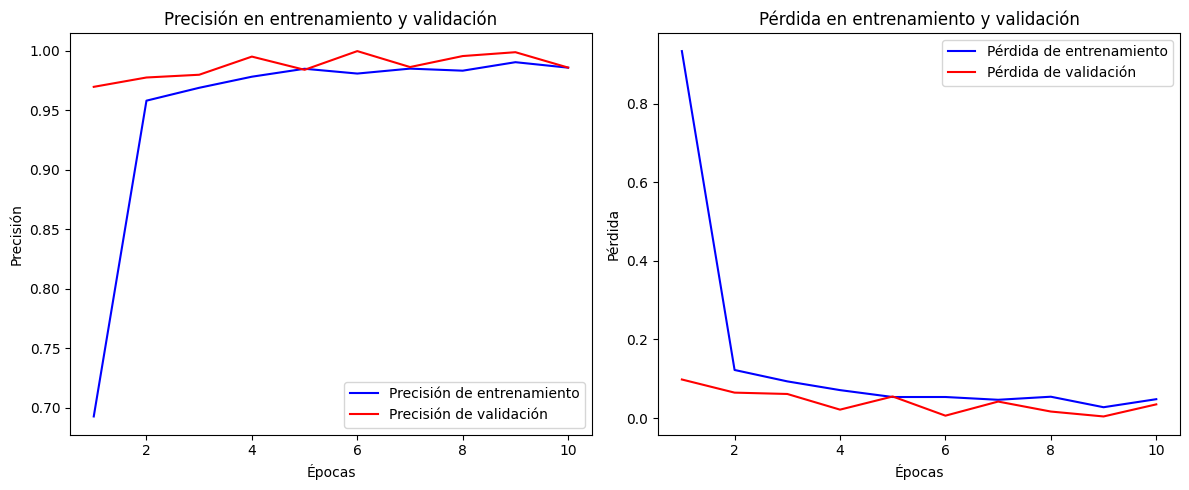

In [16]:
import matplotlib.pyplot as plt

# Obtener las métricas de entrenamiento y validación
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Crear un rango de épocas
epochs = range(1, len(acc) + 1)

# Gráfico de precisión
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Precisión de entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Precisión de validación')
plt.title('Precisión en entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Pérdida de entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida de validación')
plt.title('Pérdida en entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()
